<center><h3>Universidade Federal de Pelotas - Cursos de Ciência e Engenharia de Computação</h3></center> 
<center><h4>Disciplina: Cálculo Numérico Computacional Profa. Larissa A. de Freitas</h4> </center> 

<center><h2><strong>Relatório 2 – Sistemas de Equações Lineares<strong></h2> </center> 

<center><h3> Aluno: Vinícius Hallmann</h3></center>

# **Imports** #

In [997]:
import numpy as np
import matplotlib.pyplot as plt
from math import asin as asin
from math import exp as exp

# **Funções Auxiliares** #

In [998]:
def print_solutions( solutions ) -> None:
    for i, solution in enumerate(solutions):
        #print(f"x{i+1} = {solution}")
        print( f"x{i+1} = {np.round( solution, 3 )}" )
    
def create_concatenated_matrix( A:np.array, B:np.array ) -> np.array: return np.concatenate( ( A, B ), axis=1, dtype=float )

def gauss_partial_pivot( matrix ) -> np.array:
    num_equations = len( matrix )
    for current_row in range( num_equations ):
        max_index = np.argmax(abs(matrix[current_row:num_equations, current_row])) + current_row
        if current_row != max_index: matrix[[current_row, max_index]] = matrix[[max_index, current_row]]
    return matrix

def gauss_forward_elimination( matrix:np.array ) -> np.array:
    num_equations = matrix.shape[0]
    for current_row in range( num_equations ):
        if matrix[current_row][current_row] == 0:
            raise ValueError("Zero pivot encountered, requiring pivoting or different approach.")
        for target_row in range( current_row+1, num_equations ):
            multiplier = matrix[target_row][current_row]/matrix[current_row][current_row]
            matrix[target_row] = matrix[target_row] - ( multiplier * matrix[current_row] )
    return matrix

def gauss_backward_substitution( matrix ) -> np.array:
    num_equations = matrix.shape[0]
    solutions = np.zeros( num_equations )
    solutions[-1] = matrix[-1, -1] / matrix[-1, -2]
    for row in range( num_equations - 1, -1, -1 ):
        if matrix[row][row] == 0:
            if matrix[row, -1] != 0:
                raise ValueError("No solution")
            continue
        solutions[row] = matrix[row, -1]
        for col in range( row + 1, num_equations ):
            solutions[row] -= matrix[row, col] * solutions[col]
        solutions[row] /= matrix[row, row]
    return solutions

def lu_forward_substitution( L: np.array, B ) -> np.array:
  return np.linalg.solve( L, B )

def lu_backward_substitution( U: np.array, Y ) -> np.array:
  return np.linalg.solve( U, Y )

def create_identity_matrix(size: int) -> np.array:
    return np.eye(size, dtype=float)

def lu_partial_pivot( matrix: np.array, pivot_row: int ) -> np.array:
    size = matrix.shape[0]
    max_index = np.argmax(np.abs(matrix[pivot_row:, pivot_row])) + pivot_row
    if max_index != pivot_row:
        matrix[[pivot_row, max_index]] = matrix[[max_index, pivot_row]]
    return matrix

def is_symetric( matrix: np.array ) -> bool:
    return (matrix == matrix.T).all()

def plot_graph( x: np.array, y: np.array, title: str, history ) -> None:
    plt.plot( x, y, 'o-' )
    plt.title( title )
    plt.grid()
    plt.show()

def plot_graph(history, method: str) -> None:
    x_values_jacobi = [x[0] for x in history]
    y_values_jacobi = [x[1] for x in history]
    plt.figure(figsize=(10, 6))
    plt.plot(x_values_jacobi, y_values_jacobi, marker='o', label= method)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(method)
    plt.legend()
    plt.grid(True)
    plt.show()


green_color = "\033[32m"  
blue_color = "\033[34m"   
red_color = "\033[31m"    
reset_color = "\033[0m" 

# **Métodos** #

In [999]:
def gauss_elimination( A:np.array, B:np.array, use_pivot:bool = False ) -> np.array:
    concatenated_matrix = create_concatenated_matrix( A, B )
    if use_pivot: concatenated_matrix = gauss_partial_pivot( concatenated_matrix )
    concatenated_matrix = gauss_forward_elimination( concatenated_matrix )
    solutions = gauss_backward_substitution( concatenated_matrix )
    return solutions

def flu( matrix: np.array, use_pivot: bool = False ) -> list[np.array, np.array]:
    U = np.copy( matrix )
    size = U.shape[0]
    L = create_identity_matrix( size )
    
    for pivot_row in range( size - 1 ):
        if use_pivot:
            U = lu_partial_pivot(U, pivot_row)
        for target_row in range( pivot_row + 1, size ):
            multiplier = U[target_row, pivot_row] / U[pivot_row, pivot_row]
            L[target_row, pivot_row] = multiplier
            
            for col in range( pivot_row + 1, size ):
                U[target_row, col] -= multiplier * U[pivot_row, col]
                
            U[target_row, pivot_row] = 0
    
    return L, U

def gauss_jacobi( matrix: np.array, b_vector: np.array, initial_guess: np.array, tolerance: float, iterations: int ) -> np.array:
    current_solution = np.copy( initial_guess )
    size = matrix.shape[0]
    history = [current_solution.copy()]

    for iter in range( iterations ):
        new_solution = np.copy( current_solution )
        
        for row in range( size ):
            sum_values = b_vector[row, 0]
            for col in range( size ):
                if row != col:
                    sum_values -= matrix[row, col] * current_solution[col]
            
            new_solution[row] = sum_values / matrix[row, row]
            #print(f"x{row+1} = {new_solution[row]}")
        history.append(new_solution.copy())
        if np.linalg.norm( new_solution - current_solution, np.inf ) < tolerance:
            return new_solution, history
        
        current_solution = np.copy( new_solution )

    return current_solution, history

def gauss_seidel(matrix: np.array, b_vector: np.array, initial_guess: np.array, tolerance: float, iterations: int) -> np.array:
    current_solution = np.copy(initial_guess)
    size = matrix.shape[0]
    history = [current_solution.copy()]

    for iter in range( iterations ):
        for row in range(size):
            sum_values = b_vector[row,0]
            for col in range(size):
                if row != col:
                    sum_values -= matrix[row, col] * current_solution[col]
            current_solution[row] = sum_values / matrix[row, row]
            #print(f"x{row+1} = {current_solution[row]}")
        history.append(current_solution.copy())
        if np.linalg.norm(current_solution - initial_guess, np.inf) < tolerance:
            return current_solution, history
        
        initial_guess = np.copy(current_solution)
    
    return current_solution, history

def newton(x0, e, func, jf, iter) -> np.array:
    while max(abs(func(x0))) > e:
        s = np.linalg.solve(jf(x0), -func(x0))
        x1 = x0 + s
        if max(abs(x1 - x0)) < e: return x1
        iter -= 1
        x0 = x1
        if iter == 0: return x1

    return x1

def cholesky(matrix: np.array, use_pivot: bool = False) -> tuple[np.array, np.array]:
    size = matrix.shape[0]
    L = np.zeros((size, size))
    P = create_identity_matrix(size)
    
    if use_pivot:
        for k in range(size):
            max_index = np.argmax(np.abs(matrix[k:, k])) + k
            if max_index != k:
                matrix[[k, max_index]] = matrix[[max_index, k]]
                P[[k, max_index]] = P[[max_index, k]]
    
    for i in range(size):
        for j in range(i + 1):
            sum_values = 0
            if i == j:
                for k in range(j):
                    sum_values += L[i, k] * L[j, k]
                L[i, j] = np.sqrt(matrix[i, i] - sum_values)
            else:
                for k in range(j):
                    sum_values += L[i, k] * L[j, k]
                if L[j, j] > 0:
                    L[i, j] = (matrix[i, j] - sum_values) / L[j, j]
    
    return L

# **Questão 1** #

Considere os seguintes sistemas: 
 
$$
\begin{array}{lll}
3x_2 + 2x_3 = 5 & -2x_1 - 2x_2 = -1 & x_1 + 2x_2 + x_3 = 4 \\
x_1 + 4x_2 + x_3 = 6 & x_1 + 3x_2 - x_3 = 3 & 2x_1 + 6x_2 = 8 \\
2x_2 + 5x_3 = 7 & -x_2 + 2x_3 = 1 & x_1 + 4x_3 = 5 \\
\end{array}
$$

Resolva os sistemas acima, quando possível, usando:

a) Eliminação de Gauss sem e com Pivotamento Parcial. 

b) Fatoração LU sem e com Pivotamento Parcial.  

c) Fatoração Cholesky sem e com Pivotamento Parcial. 

Observação: Faça operações aritméticas com aproximação de três dígitos por 
arredondamento.

In [1000]:
S1A = np.array([[0, 3, 2], [1, 4, 1], [0, 2, 5]], dtype=float)  
S1B = np.array([[5], [6], [7]], dtype=float)

S2A = np.array([[-2, -2, 0], [1, 3, -1], [0, -1, 2]], dtype=float)
S2B = np.array([[-1], [3], [1]], dtype=float)

S3A = np.array([[1, 2, 1], [2, 6, 0], [1, 0, 4]], dtype=float)
S3B = np.array([[4], [8], [5]], dtype=float)


### **Gauss** ###

Para o primeiro sistema usando Eliminação de Gauss é preciso usar pivotamento caso queira achar a solução sendo a resposta [1. 1. 1.].

Já no segundo sistema foi possivel resolver com e sem pivotamento sendo a resposta [-1.5  2.   1.5] para os dois.

No terceiro sistema tambem foi possivel resolver com e sem pivotamento sendo a resposta [1. 1. 1.].

#### **Primeiro Sistema** ####

In [1001]:
#"""
#print(f"Com pivotamento: {gauss_elimination(S1A, S1B, False)}")
print(f"Sem pivotamento: {gauss_elimination(S1A, S1B, True)}")
#"""

Sem pivotamento: [1. 1. 1.]


#### **Segundo Sistema** ####

In [1002]:
#"""
print(f"Com pivotamento: {gauss_elimination(S2A, S2B, False)}")
print(f"Sem pivotamento: {gauss_elimination(S2A, S2B, True)}")
#"""

Com pivotamento: [-1.5  2.   1.5]
Sem pivotamento: [-1.5  2.   1.5]


#### **Terceiro Sistema** ####

In [1003]:
#"""
print(f"Com pivotamento: {gauss_elimination(S3A, S3B, False)}")
print(f"Sem pivotamento: {gauss_elimination(S3A, S3B, True)}")
#"""

Com pivotamento: [1. 1. 1.]
Sem pivotamento: [1. 1. 1.]


### **LU** ###

#### **Primeiro Sistema** ####

##### Sem pivotamento #####

Erro de divisão por zero, então precisa pivotar

In [1004]:
"""
L, U = flu(S1A, False) 
print("Forward Substitution\n")
print(lu_forward_substitution(L, S1B))
print("Backward Substitution\n")
print(lu_backward_substitution(U, S1B))
"""

'\nL, U = flu(S1A, False) \nprint("Forward Substitution\n")\nprint(lu_forward_substitution(L, S1B))\nprint("Backward Substitution\n")\nprint(lu_backward_substitution(U, S1B))\n'

##### Com pivotamento #####

In [1005]:
#"""
L, U = flu(S1A, True)
print("Forward Substitution\n")
print(lu_forward_substitution(L, S1B))
print("Backward Substitution\n")
print(lu_backward_substitution(U, S1B))
#"""

Forward Substitution

[[5.]
 [6.]
 [3.]]
Backward Substitution

[[0.18181818]
 [0.72727273]
 [1.90909091]]


#### **Segundo Sistema** ####

##### Sem pivotamento #####

In [1006]:
#"""
L, U = flu(S2A, False)
print("Forward Substitution\n")
print(lu_forward_substitution(L, S2B))
print("Backward Substitution\n")
print(lu_backward_substitution(U, S2B))
#"""

Forward Substitution

[[-1.  ]
 [ 2.5 ]
 [ 2.25]]
Backward Substitution

[[-1.33333333]
 [ 1.83333333]
 [ 0.66666667]]


##### Com pivotamento #####

In [1007]:
#"""
L, U = flu(S2A, True)
print("Forward Substitution\n")
print(lu_forward_substitution(L, S2B))
print("Backward Substitution\n")
print(lu_backward_substitution(U, S2B))
#"""

Forward Substitution

[[-1.  ]
 [ 2.5 ]
 [ 2.25]]
Backward Substitution

[[-1.33333333]
 [ 1.83333333]
 [ 0.66666667]]


#### **Terceiro Sistema** ####

##### Sem pivotamento #####

In [1008]:
#"""
L, U = flu(S3A, False)
print("Forward Substitution\n")
print(lu_forward_substitution(L, S3B))
print("Backward Substitution\n")
print(lu_backward_substitution(U, S3B))
#"""

Forward Substitution

[[ 4.]
 [-0.]
 [ 1.]]
Backward Substitution

[[-19.]
 [  9.]
 [  5.]]


##### Com Pivotamento #####

In [1009]:
#"""
L, U = flu(S3A, True)
print("Forward Substitution\n")
print(lu_forward_substitution(L, S3B))
print("Backward Substitution\n")
print(lu_backward_substitution(U, S3B))
#"""

Forward Substitution

[[4.]
 [6.]
 [1.]]
Backward Substitution

[[ 70.        ]
 [-22.66666667]
 [-15.        ]]


### **Cholesky** ###

Antes de testar os sistemas com o método de Cholesky precisamo garantir que a matriz de entrada seja simétrica.

In [1010]:
print(f"Sistema 1 é simétrico? {red_color}{is_symetric(S1A)}{reset_color}")
print(f"Sistema 2 é simétrico? {red_color}{is_symetric(S2A)}{reset_color}")
print(f"Sistema 3 é simétrico? {green_color}{is_symetric(S3A)}{reset_color}")

Sistema 1 é simétrico? False
Sistema 2 é simétrico? False
Sistema 3 é simétrico? True


Somente o terceiro sistema pode ser resolvido com o método de Cholesky e o resultado com e sem pivotamento é 


$$
L = 
\begin{bmatrix}
1 & 0 & 0 \\
2  & 1.41421356 & 0\\
1 & -1.41421356 & 1\\
\end{bmatrix}
$$


$x_1 = 4, x_2 = - e x_3 = 1$

O terceiro sistema pode ser resolvido usando o método de Cholesky e os resultados com e sem pivotamento são:

Sem pivotamento: $x_1 = 4$, $x_2 = 0 $, $x_3 = 1$

Com pivotamento: $x_1 = 2.828$, $x_2 = 4.899 $, $x_3 = 2.739$

#### **Terceiro Sistema** ####

In [1011]:
LSP = cholesky(S3A, False)
LCP = cholesky(S3A, True)
print(f"\n{red_color}Without{reset_color} Partial Pivoting")
print(LSP)
print(f"\n{green_color}With{reset_color} Partial Pivoting")
print(LCP)


Without Partial Pivoting
[[ 1.          0.          0.        ]
 [ 2.          1.41421356  0.        ]
 [ 1.         -1.41421356  1.        ]]

With Partial Pivoting
[[ 1.41421356  0.          0.        ]
 [ 0.70710678  1.22474487  0.        ]
 [ 0.70710678 -0.40824829  1.82574186]]


##### **Achando $x_1$,$x_2$,$x_3$** #####

In [1012]:
print_solutions( np.linalg.solve( LSP, S3B ) )
print_solutions( np.linalg.solve( LCP, S3B ) )

x1 = [4.]
x2 = [-0.]
x3 = [1.]
x1 = [2.828]
x2 = [4.899]
x3 = [2.739]


##### **Usando soluções encontradas para reconstruir o sistema** #####

In [1013]:
reconstructed_A = np.dot( LSP, LSP.T )
print(f"\n{red_color}Without{reset_color} Partial Pivoting")
print(reconstructed_A)

reconstructed_A = np.dot( LCP, LCP.T )
print(f"\n{green_color}With{reset_color} Partial Pivoting")
print(reconstructed_A)


Without Partial Pivoting
[[1.00000000e+00 2.00000000e+00 1.00000000e+00]
 [2.00000000e+00 6.00000000e+00 4.05861454e-17]
 [1.00000000e+00 4.05861454e-17 4.00000000e+00]]

With Partial Pivoting
[[2.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.00000000e+00 1.73428748e-19]
 [1.00000000e+00 1.73428748e-19 4.00000000e+00]]


O resultado da matriz resolvida com os valores do método são:
$$
\text{Sem pivotamento} = 
\begin{bmatrix}
1.00000000e+00 & 2.00000000e+00 & 1.00000000e+00\\
2.00000000e+00 & 6.00000000e+00 & 4.05861454e-17\\
1.00000000e+00 & 4.05861454e-17 & 4.00000000e+00\\
\end{bmatrix}
$$

$$
\text{Com pivotamento} = 
\begin{bmatrix}
2.00000000e+00  & 1.00000000e+00 & 1.00000000e+00\\
1.00000000e+00 & 2.00000000e+00 & 1.73428748e-19\\
1.00000000e+00 & 1.73428748e-19 & 4.00000000e+00\\
\end{bmatrix}
$$

A matriz com a solução sem pivotamento se aproximou muito dos valores iniciais do terceiro sistema.

### **Conclusão** ###

Os sistemas foram resolvidos com sucesso utilizando, e em alguns caso somente com a pivotação parcial se mostrou necessária para garantir a estabilidade numérica e evitar a divisão por zero.

# **Questão 2** #


Considere o sistema: 


$$
\begin{array}{lll}
1x_1 + x_2 + 3x_3 = -2 \\
αx_1 + x_2 + 4x_3 = -3 \\
5x_1 + 2x_2 + 1x_3 = 4 \\
\end{array}
$$

Para os valores de α:  

a) A matriz A pode ser decomposta em L.U.? Justifique. 

b) O sistema pode ser resolvido por Fatoração Cholesky? Justifique. 

c) Considere  α = 1 e resolva o sistema pelo Método de Eliminação de Gauss  sem pivotamento

In [1014]:
A = np.array([[1,1,3], [1,1,4], [5,2,1]])
B = np.array([[-2], [-3], [4]])

### **A matriz pode ser decomposta em L.U.?** ###

Para que uma matriz X possa ser decomposta em L.U.: Se o determinante de todos os menores principais da matriz A forem não-nulos. Podemos então calcular os determinantes e determinar se podemos ou não decompor essa matriz.

Submatriz Det ( $A_{11}$ ) = 1

Submatriz Det ( $A_{22}$ ) = 1 ⋅ 1 −1 ⋅ α = 1 −α.

Submatriz Det ( $A_{33}$ ) = 1 ⋅ ( 1 ⋅ 1 −4 ⋅ 2 ) −1 ⋅( α ⋅ 1 − 4 ⋅ 5 ) + 3 ⋅ ( α ⋅ 2 −1 ⋅ 5 ) = 5α − 2

Para que possamos decompor essa função Det ( $A_{11}$ ), Det ( $A_{22}$ ), Det ( $A_{33}$ ) não podem ser nulos então α precisa ser diferente de 1 pois caso ele seja igual a 1 então Det ( $A_{22}$ ) = 1 −1 = 0

### **O sistema pode ser resolvido por Fatoração Cholesky?** ###

Para que uma matriz X possa ser fatorada pelo método Cholesky: Se for simétrica e positiva definida

Podemos verificar isso e determinar se pode ou não ser resolvida

$$
A = 
\begin{bmatrix}
1 & 1 & 3 \\
α  & 1 & 4\\
5 & 2 & 1\\
\end{bmatrix}
$$

$A$ não é simétrica, pois $A_{31} = 5$ e $A_{13} = 3$ o que impede a aplicação da fatoração de Cholesky.


### **Usando Eliminação de Gauss** ###

Testando o codigo "gauss_solution_without_pivot = gauss_elimination(A, B, False)" o erro de que um 0 foi encontrado com pivô acontece portanto seria necessário usar pivotamento para resolver o sistema.

In [1015]:
#gauss_solution_without_pivot = gauss_elimination(A, B, False) #Se rodar isso, vai dar erro de divisão por zero
gauss_solution_with_pivot     = gauss_elimination(A, B, True)
print("Solução do sistema usando Eliminação de Gauss com pivoteamento parcial")
print_solutions( gauss_solution_with_pivot )

Solução do sistema usando Eliminação de Gauss com pivoteamento parcial
x1 = 1.0
x2 = 0.0
x3 = -1.0


# **Questão 3** #

Considere o seguinte sistema de equaç ões para determinar as concentrações 
c1,c2 e c3 (g/m3) numa série de 3 reatores como função da quantidade de massa à entrada de cada reator (termo independente do sistema em g): 

$$
\begin{array}{lll}
17c_1 - 2c_2 - 3_c3 = 500 \\
-5c_1 + 21c_2 - 2c_3 = 200 \\
-5c_1 - 5c_2 + 22c_3 = 30 \\
\end{array}
$$


a) Analise as condições de convergência do método de Gauss-Jacobi e Gauss-Seidel quando aplicado ao sistema.  

b) Aplique o método de Gauss-Jacobi e de Gauss-Seidel ao sistema, considerando como aproximação inicial o ponto (34, 19, 13) e ε1 = 0.0025 ou no máximo 2 iterações

In [1016]:
A = np.array([[17, -2, -3], [-5, 21, -2], [-5, -5, 22]], dtype=float)
B = np.array([[500], [200], [30]], dtype=float)
initial_guess = np.array([34, 19, 13], dtype=float)

### Análise de condições de convergência ###

A convergência é garantida se qualquer uma das duas condições for satisfeita:

a) Se o raio espectral $p(m)$ < 1;

In [1017]:
print(np.max(np.abs(np.linalg.eigvals(A))).real)

23.74885541853668




b) Se a matriz A for diagonalmente dominante.
- Podemos pegar $A_{11}$, $A_{22}$, $A_{33}$ e verificar sua dominancia sobre sua linha.
    - $|A_{11}|$ = 17 > $|A_{12}|$ = 2 e $|A_{11}|$ = 17 > $|A_{13}|$ = 3
    - $|A_{22}|$ = 21 > $|A_{21}|$ = 5 e $|A_{22}|$ = 17 > $|A_{23}|$ = 2
    - $|A_{33}|$ = 22 > $|A_{31}|$ = 5 e $|A_{33}|$ = 17 > $|A_{32}|$ = 5

No caso desse sistema $A$ a matriz é diagonalmente dominante e portanto será garantida sua convergência usando os métodos Gauss-Jacobi ou Gauss-Seidel

In [1018]:
gauss_jacobi_solution, h = gauss_jacobi(A, B, initial_guess, 0.0025, 2)
print(f"Solução de Gauss-Jacobi: {green_color}{gauss_jacobi_solution}{reset_color}")

gauss_seidel_solution, h = gauss_seidel(A, B, initial_guess, 0.0025, 2)
print(f"Solução de Gauss-Seidel: {green_color}{gauss_seidel_solution}{reset_color}")


Solução de Gauss-Jacobi: [33.99656226 18.88209829 13.36325439]
Solução de Gauss-Seidel: [33.98626402 18.88816489 13.38055203]


Os métodos de Gauss-Jacobi e Gauss-Seidel convergiram para soluções próximas. A diagonal dominante da matriz $A$ garante a convergência dos métodos

# **Questão 4** #


Considere o sistema: 
$$
\begin{array}{ll}
    2x_1 + 5x_2 = -3 \\
    3x_1 + x_2  = 2 \\₁
\end{array}
$$

### Aplique analítica e graficamente os métodos Gauss-Jacobi e Gauss-Seidel. ###

Usando esse sistema sem permutação desse jeito:

In [1019]:
A = np.array([[2, 5], [3, 1]], dtype=float)
B = np.array([[-3], [2]], dtype=float)
initial_guess = np.array([1, 1], dtype=float)
gauss_jacobi_solution, jh= gauss_jacobi(A, B, initial_guess, 0.005, 10)
gauss_seidel_solution, sh = gauss_seidel(A, B, initial_guess, 0.005, 10)

Os resultados obtidos para o método de Gauss Jacobi foram:

Solução de Gauss-Jacobi: [1.00000000e+00 4.74599375e+04]


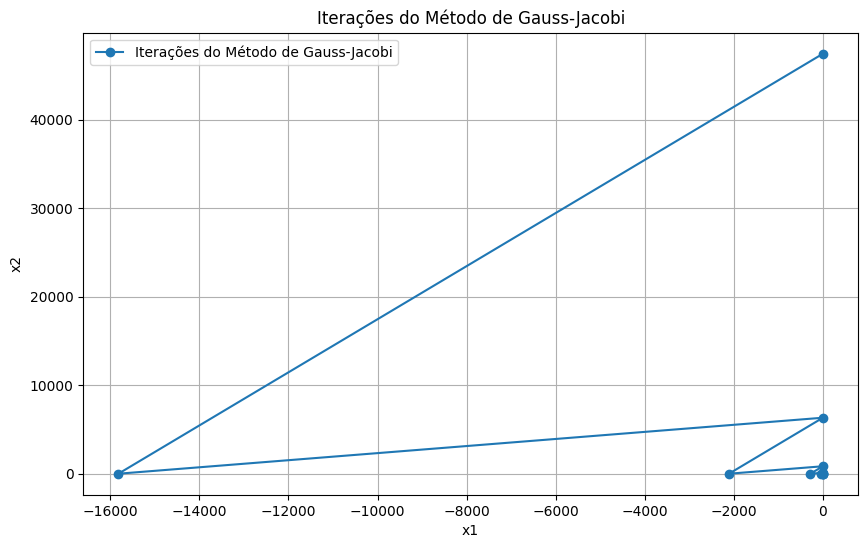

In [1020]:
print(f"Solução de Gauss-Jacobi: {green_color}{gauss_jacobi_solution}{reset_color}")
plot_graph(jh, "Iterações do Método de Gauss-Jacobi")

Os resultados obtidos para o método de Gauss Seidel foram:

Solução de Gauss-Seidel: [-3.75423430e+08  1.12627029e+09]


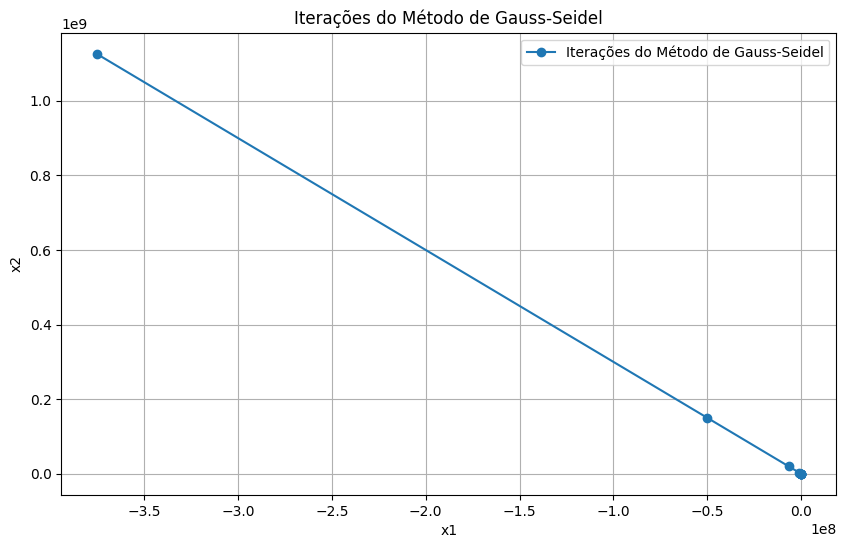

In [1021]:
print(f"Solução de Gauss-Seidel: {green_color}{gauss_seidel_solution}{reset_color}")
plot_graph(sh, "Iterações do Método de Gauss-Seidel")

### Permute as equações e aplique analítica e graficamente os métodos Gauss-Jacobi e Gauss-Seidel. ###

Permutando $x_1$ com $x_2$ e iterando até a convergência obtive a solução aproximada: $X≈[−1,0.9984]$ para o **método de Jacobi** e para o **método de Seidel** a solução é $X≈[-1.  1.]$

Solução de Gauss-Jacobi: [-1.          0.99841975]


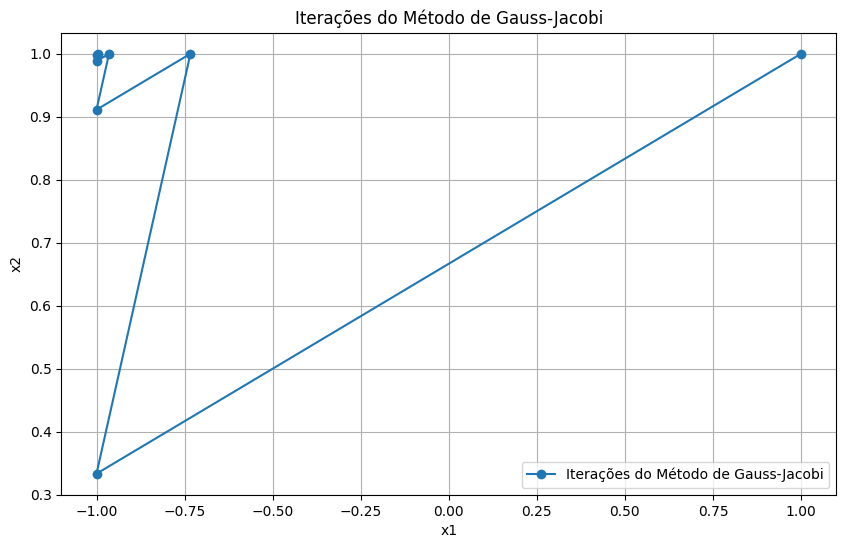

Solução de Gauss-Seidel: [-1.  1.]


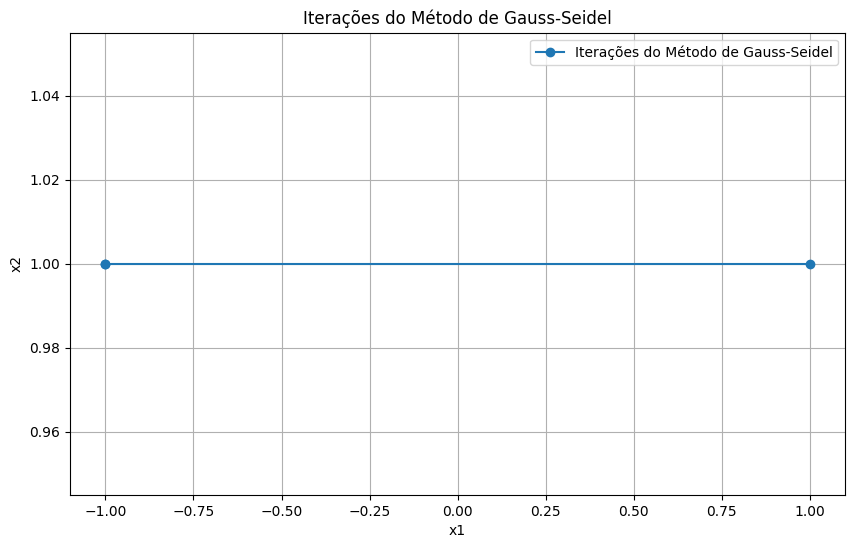

In [1022]:
A = np.array([[5, 2], [1, 3]], dtype=float)
B = np.array([[-3], [2]], dtype=float)
initial_guess = np.array([1, 1], dtype=float)
gauss_jacobi_solution, jh= gauss_jacobi(A, B, initial_guess, 0.005, 10)
print(f"Solução de Gauss-Jacobi: {green_color}{gauss_jacobi_solution}{reset_color}")
plot_graph(jh, "Iterações do Método de Gauss-Jacobi")

gauss_seidel_solution, sh = gauss_seidel(A, B, initial_guess, 0.005, 10)
print(f"Solução de Gauss-Seidel: {green_color}{gauss_seidel_solution}{reset_color}")
plot_graph(sh, "Iterações do Método de Gauss-Seidel")

### Compare os resultados obtidos ###

Os métodos Gauss-Jacobi e Gauss-Seidel mostraram resultados distintos ao resolver o sistema de equações sem permutação. O método de Gauss-Jacobi divergiu, apresentando uma solução extremamente grande, enquanto o método de Gauss-Seidel também divergiu, apresentando valores ainda maiores.

Após permutar as equações para melhorar a convergência, ambos os métodos convergiram para soluções razoáveis. O método de Gauss-Jacobi convergiu para a solução aproximada [-1. 0.9984], enquanto o método de Gauss-Seidel convergiu para a solução [-1. 1.].

Isso demonstra a importância do condicionamento da matriz e da escolha inicial das variáveis. A permutação das equações melhorou significativamente a estabilidade e a convergência dos métodos iterativos aplicados.

# **Questão 5** #


Resolva o seguinte sistema de equações não linear usando o método iterativo 
de Newton e considere a aproximação inicial com o valor (0 ,0 ,0). 

$$
\begin{array}{ll}
    3sen(x) – 4y –12z – 1 = 0 \\
    4x^2 – 8y – 10z + 5 = 0 \\
    2e^x  + 2y + 3z – 8 = 0 \\
\end{array}
$$


In [1023]:
f = lambda x: np.array( [ 3 * np.sin(x[0]) - 4 * x[1] - 12 * x[2] - 1, 
                          4 * x[0]**2 - 8 * x[1] - 10 * x[2] + 5, 
                          2 * np.exp(x[0]) + 2 * x[1] + 3 * x[2] - 8] )

jf = lambda x: np.array( [ [3 * np.cos(x[0]), -4, -12], 
                           [8 * x[0], -8, -10], 
                           [2 * np.exp(x[0]), 2, 3]] )
newton_solution = newton([0,0,0], 10**-5, f, jf, 100)
print(f"Solução de Newton: {green_color}{newton_solution}{reset_color}")
print(f"Substituindo na função: {green_color}{f(newton_solution)}{reset_color} que são valores muito próximos de zero")


Solução de Newton: [ 1.06999055  1.76139911 -0.45116738]
Substituindo na função: [-3.24620331e-11  9.86837279e-11  7.19246884e-11] que são valores muito próximos de zero
